In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from lib5 import quad, getV
import lin_Fit as lf
from scipy.signal import argrelmax
import sympy as sp
from scipy.stats import norm

In [4]:
df=pd.read_csv('data/completa5.txt', sep = '\t', skiprows=1)

# Analisi 4.5

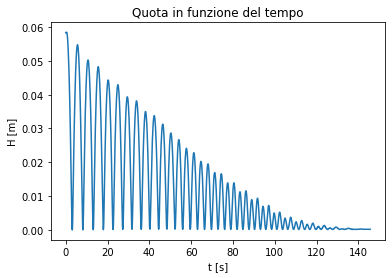

In [5]:
h = df['Position (m)'].to_numpy()
t = df['Time (s)'].to_numpy()
H = h.max()-h#cosi facendo i punti piu alti sono effetivamente le quote raggiunte dal pesetto oscillazione dopo oscillazione
#plt.plot(t,h)
plt.plot(t,H)
plt.xlabel('t [s]')
plt.ylabel('H [m]')
plt.title('Quota in funzione del tempo')
plt.savefig('fig5d/H(t).pdf')

In [6]:
CUT=argrelmax(H)
print(CUT)


(array([2885, 6041]),)


# Calcolo di \Deltah/h

0.06876606683804631
0.10006901311249133
0.016104294478527535
0.08261886204208899
0.028887000849617636
0.08836395450568678
0.029750479846449056
0.07814045499505458
0.03540772532188829
0.0734149054505006
0.08883553421368547
0.06851119894598146
0.09476661951909479
0.05781249999999999
Tutti i valori [0.06876607 0.10006901 0.01610429 0.08261886 0.028887   0.08836395
 0.02975048 0.07814045 0.03540773 0.07341491 0.08883553 0.0685112
 0.09476662 0.0578125 ]
Quelli tagliati [0.06876607 0.08261886 0.08836395 0.07814045 0.07341491 0.08883553
 0.0685112  0.09476662]


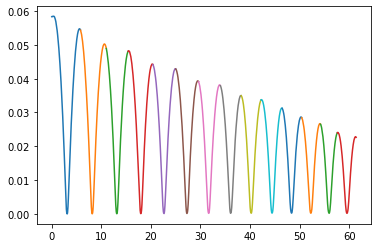

In [7]:

cut_old=np.array([  18,  200, 375, 534 ,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2158, 2255, 2375,2480, 2580 ,2680, 2777,2877,2975,3070,3164])
cut = np.array([0,290,550,770,  1020, 1250, 1480, 1700, 1910, 2110, 2322, 2520, 2710,2880,3070])#3240,3400,3550,3720,3880,4000])
delta_H=np.arange(14.0)
for i in range(cut.size-1):
    
    H_=H[cut[i]:cut[i+1]]
    t_=t[cut[i]:cut[i+1]]
    delta_H[i]=(H[cut[i]]- H[cut[i+1]])/ H[cut[i]]
    (delta_H[i])
    plt.plot(t_,H_)
    print(delta_H[i])


print('Tutti i valori',delta_H)
delta_H = np.delete(delta_H,[1,2,4,6,8,13])
c=delta_H
print('Quelli tagliati', delta_H)

# Stima $\Delta_h/h$

In [8]:
delta=np.mean(delta_H)
sigma_delta=np.std(delta_H,ddof=1)/np.sqrt(delta_H.size)
print("Delta: {:.4f}".format(delta),"Delta: {:.2g}".format(sigma_delta),sep='\t' )

Delta: 0.0804	Delta: 0.0035


# istogramma di $\Delta_h/h$ e calcolo di Ma 

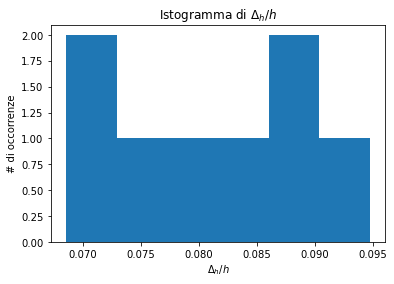

In [9]:
binsize=np.std(delta_H, ddof=1)/2
interval_bins=delta_H.max()-delta_H.min()
nbins=int(interval_bins/binsize+1)
plt.hist(delta_H, bins = nbins)
plt.xlabel('$\Delta_h/h$')
plt.ylabel('# di occorrenze')
plt.title('Istogramma di $\Delta_h/h$')
plt.savefig('fig5d/istoDeltaH.pdf')

In [10]:
r=0.01066
m=0.5593
g=9.8065
M_a=(m*g*r*delta)/(2-delta)
M_a


0.002449708540002189

In [11]:
ris=0.0000005
sigma_m=0.1
sigma_r=0.000022
#sigma_M=(((g*r*delta*sigma_m)/(2-delta))**2 + ((m*g*delta*sigma_r)/(2-delta))**2 + ((2*std*m*g*r*(1-delta))/(2-delta)**2)**2)**0.5
#sigma_M
sigma_M_a = ()

# Stima Incertezze

In [12]:
_m,_r,_delta = sp.symbols('m,r,delta')
_g = sp.Symbol('g')
_sigma_m,_sigma_r,_sigma_delta = sp.symbols('sigma_m,sigma_r,sigma_delta')
_M_a = (_m*_g*_r*_delta)/(2-_delta)
_sigma_M_a = quad(sp.diff(_M_a,_r)*_sigma_r,
                  sp.diff(_M_a,_m)*_sigma_m,
                  sp.diff(_M_a,_delta)*_sigma_delta)
sigma_M_a = _sigma_M_a.subs([(_g,9.805),(_m,m),(_r,r),(_delta,delta),(_sigma_m,sigma_m),(_sigma_r,sigma_r),(_sigma_delta,sigma_delta)])
float(sigma_M_a)

0.0004516294095005627

In [13]:
print("M_a: {:.5f}".format(M_a), "sigma_M_a: {:.2g}".format(sigma_M_a),"nu: {:.2%}".format(sigma_M_a/M_a), sep = '\t'  )

M_a: 0.00245	sigma_M_a: 0.00045	nu: 18.44%


# Accordo Misure di $M_a$

In [14]:
M_a_precedente = 0.005666034330301021
sigma_M_a_precedente = 0.00110972325801816
z = (M_a-M_a_precedente)/quad(sigma_M_a, sigma_M_a_precedente)
print("{:.2f}".format(z))

-2.68


#configurazione4 bulloni

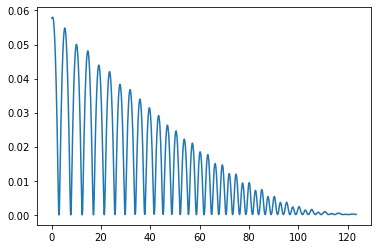

In [15]:
dff=pd.read_csv('data/completa4.txt', sep = '\t', skiprows=1)
h = dff['Position (m)'].to_numpy()
t =dff['Time (s)'].to_numpy()
H = h.max()-h
plt.plot(t,H)

Tutti i valori [ 0.05191434  0.09445585  0.03930461  0.08261212  0.03945111  0.08839286
  0.04113614  0.09805924  0.05775764  0.06971154  0.09431525  0.06276748
  0.09741248  0.05227656 14.         15.         16.         17.
 18.         19.         20.         21.         22.         23.
 24.         25.         26.         27.         28.         29.        ]
Quelli tagliati [ 0.09445585  0.08261212  0.08839286  0.06971154  0.09431525  0.06276748
  0.09741248 14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.        ]


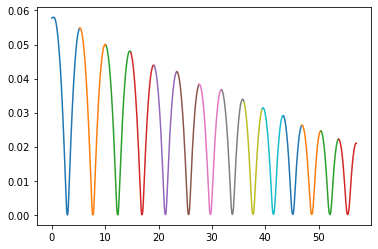

In [16]:
cut_old=np.array([  0,  260, 510, 740 ,  960, 1170, 1380, 1590 ,1800, 1970, 2170,2340, 2520 ,2685,2850])
delta_H=np.arange(30.0)
H_=np.arange(30.0)
t_=np.arange(30.0)
for i in range(cut_old.size-1):
    
    H_=H[cut_old[i]:cut_old[i+1]]
    t_=t[cut_old[i]:cut_old[i+1]]
    delta_H[i]=(H[cut_old[i]]- H[cut_old[i+1]])/ H[cut_old[i]]
    plt.plot(t_,H_)
    #print(delta_H[i])


print('Tutti i valori',delta_H)
delta_H = np.delete(delta_H,[0,2,4,6,7,8,13])
print('Quelli tagliati', delta_H)

In [29]:
F=np.arange(40.0)
for i in range(c.size):
    F[i]=c[i]
for i in range(delta_H.size):
    F[c.size+i]=delta_H[i]
F=F[0:14]
F

array([0.06876607, 0.08261886, 0.08836395, 0.07814045, 0.07341491,
       0.08883553, 0.0685112 , 0.09476662, 0.09445585, 0.08261212,
       0.08839286, 0.06971154, 0.09431525, 0.06276748])

In [22]:
F = np.array([0.06876607, 0.08261886, 0.08836395, 0.07814045, 0.07341491,
       0.08883553, 0.0685112 , 0.09476662, 0.09445585, 0.08261212,
       0.08839286, 0.06971154, 0.09431525, 0.06276748])

Text(0.5, 1.0, 'Istogramma di $\\Delta_h/h$')

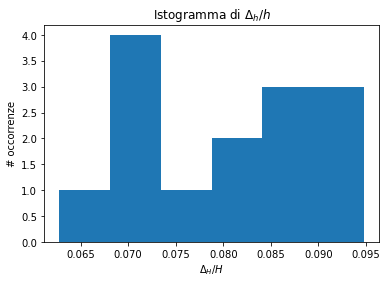

In [23]:
plt.hist(F, bins = 6)
plt.xlabel('$\Delta_H/H$')
plt.ylabel('# occorrenze')
plt.title('Istogramma di $\Delta_h/h$')
#plt.savefig('fig5d/histDelta++.pdf')

In [31]:
delta = np.mean(F)
sigma_delta = np.std(F, ddof=1)/np.sqrt(F.size)
M_a=(m*g*r*delta)/(2-delta)
_m,_r,_delta = sp.symbols('m,r,delta')
_g = sp.Symbol('g')
_sigma_m,_sigma_r,_sigma_delta = sp.symbols('sigma_m,sigma_r,sigma_delta')
_M_a = (_m*_g*_r*_delta)/(2-_delta)
_sigma_M_a = quad(sp.diff(_M_a,_r)*_sigma_r,
                  sp.diff(_M_a,_m)*_sigma_m,
                  sp.diff(_M_a,_delta)*_sigma_delta)
sigma_M_a = _sigma_M_a.subs([(_g,9.805),(_m,m),(_r,r),(_delta,delta),(_sigma_m,sigma_m),(_sigma_r,sigma_r),(_sigma_delta,sigma_delta)])
sigma_M_a = float(sigma_M_a)
print("delta: {:.4f}".format(delta),"sigma_delta: {:.2g}".format(sigma_delta),"nu: {:.2%}".format(sigma_delta/delta),sep='\t')
print("M_a: {:.5f}".format(M_a),"sigma_M_a: {:.2g}".format(sigma_M_a),"nu: {:.2%}".format(sigma_M_a/M_a),sep='\t')

delta: 0.0811	sigma_delta: 0.0029	nu: 3.60%
M_a: 0.00247	sigma_M_a: 0.00045	nu: 18.27%


$M_a = 0.00247~[Nm]$

$\sigma_{M_a} = 0.00046~[Nm]$

$\nu = 0.18$

In [32]:
M_a_precedente = 0.005666034330301021
sigma_M_a_precedente = 0.00110972325801816
z = (M_a-M_a_precedente)/quad(sigma_M_a, sigma_M_a_precedente)
print("{:.2f}".format(z))

-2.67
